In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#DC3545',
    'blue': "#4476C2",
    'cyan': '#0AA2C0',
    'green': '#1AA179',
    'purple': '#7121F3',
    'orange': '#FD7E14',
    'yellow': '#FFC107',
    'pink': '#D63384',
    'white_green': "#64B099"
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)

<Figure size 1400x1000 with 0 Axes>

In [12]:
df = pd.read_csv('dfp.csv')
print(df['id_client'].nunique())

48705


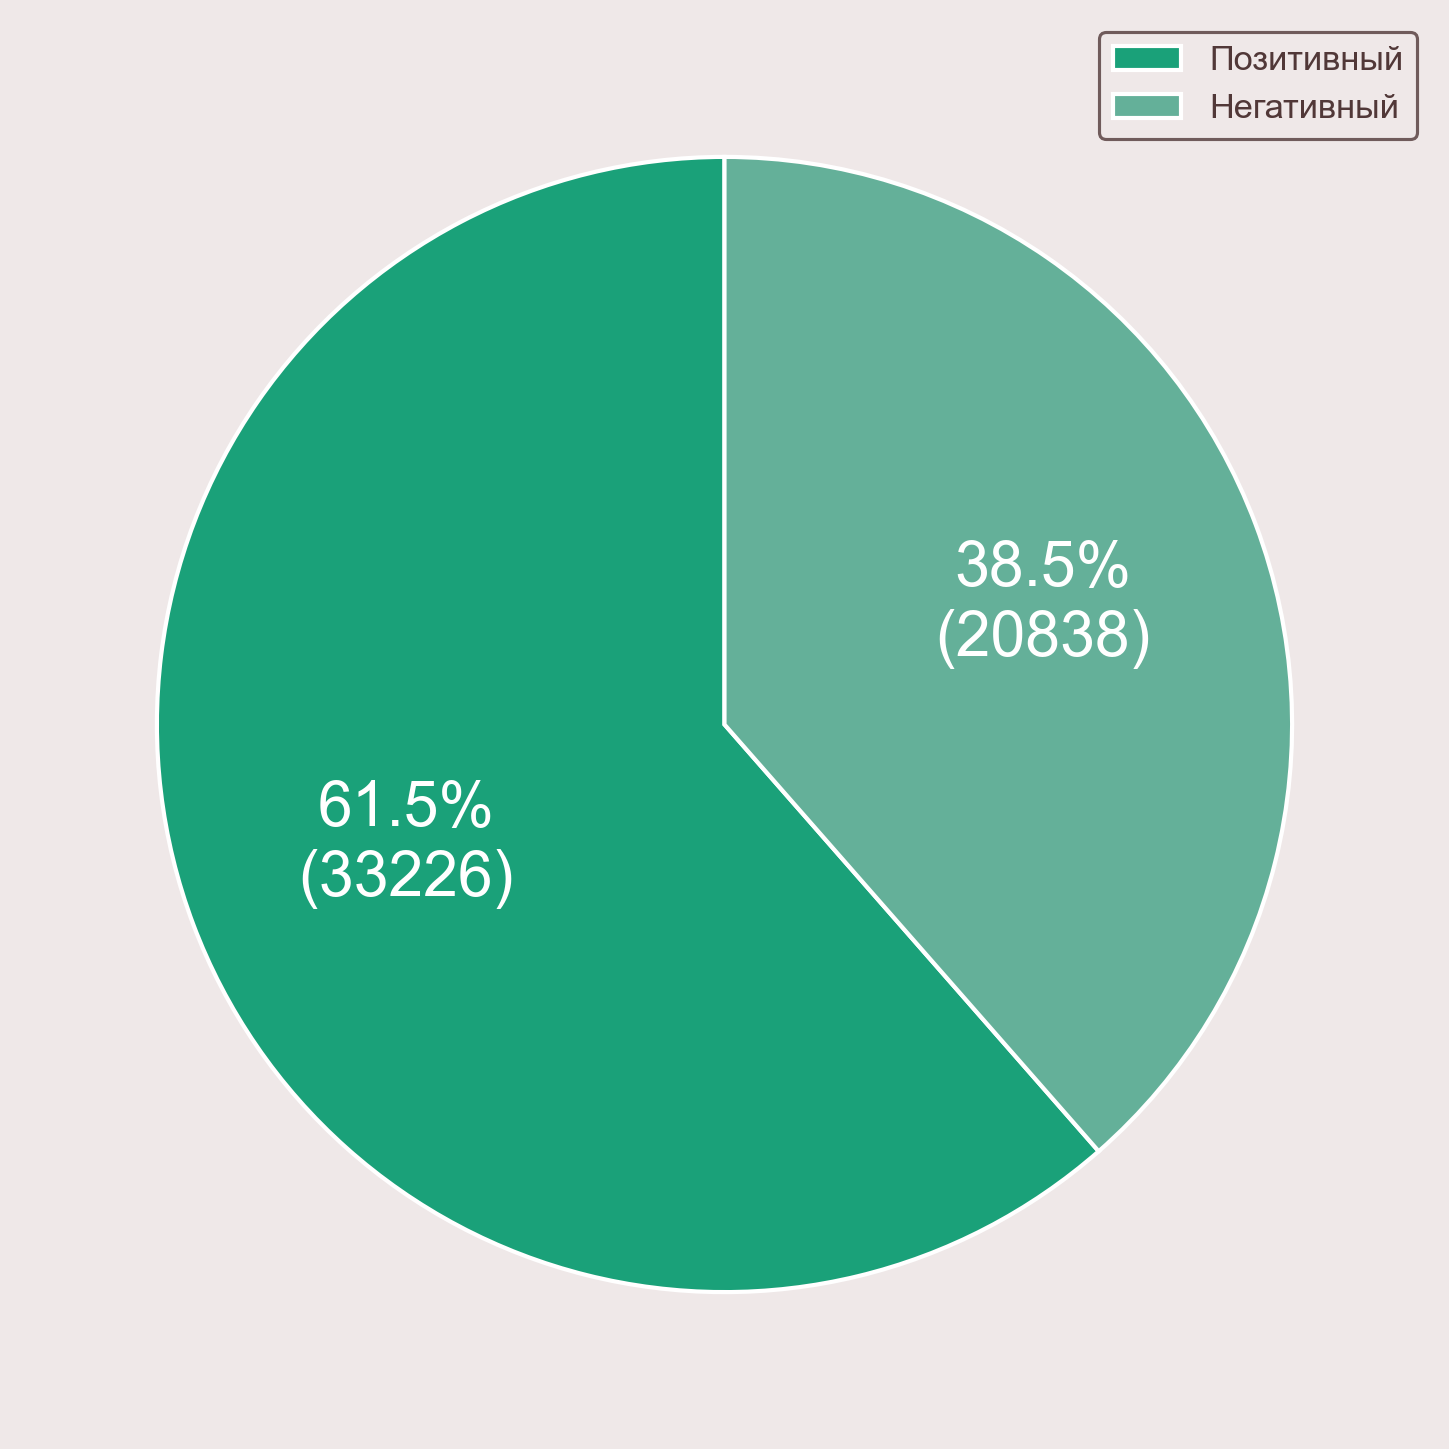

In [13]:
s = df['review_emotion'].copy()

s = s.map({0: "Негативный", 1: "Позитивный"})

counts = s.value_counts()

labels = counts.index.tolist()
sizes  = counts.values

fig, ax = plt.subplots(figsize=(14, 10), dpi=150)

ax.grid(False)

def autopct_func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    if pct > 0:
        return f"{pct:.1f}%\n({absolute})"
    else:
        return ""

wedges, _, autotexts = ax.pie(
    sizes,
    startangle=90,
    colors=[colors["green"], colors["white_green"]],
    autopct=lambda p: autopct_func(p, sizes),
    wedgeprops=dict(edgecolor="white", linewidth=2),
    textprops=dict(color="white", fontsize=30) 
)

ax.legend(
    wedges, labels,
    loc="upper right",
    frameon=True,
    facecolor=colors["bg"],
    edgecolor=colors["text"]
)

ax.set_aspect("equal")
ax.set_xticks([]); ax.set_yticks([])

plt.tight_layout()
plt.show()

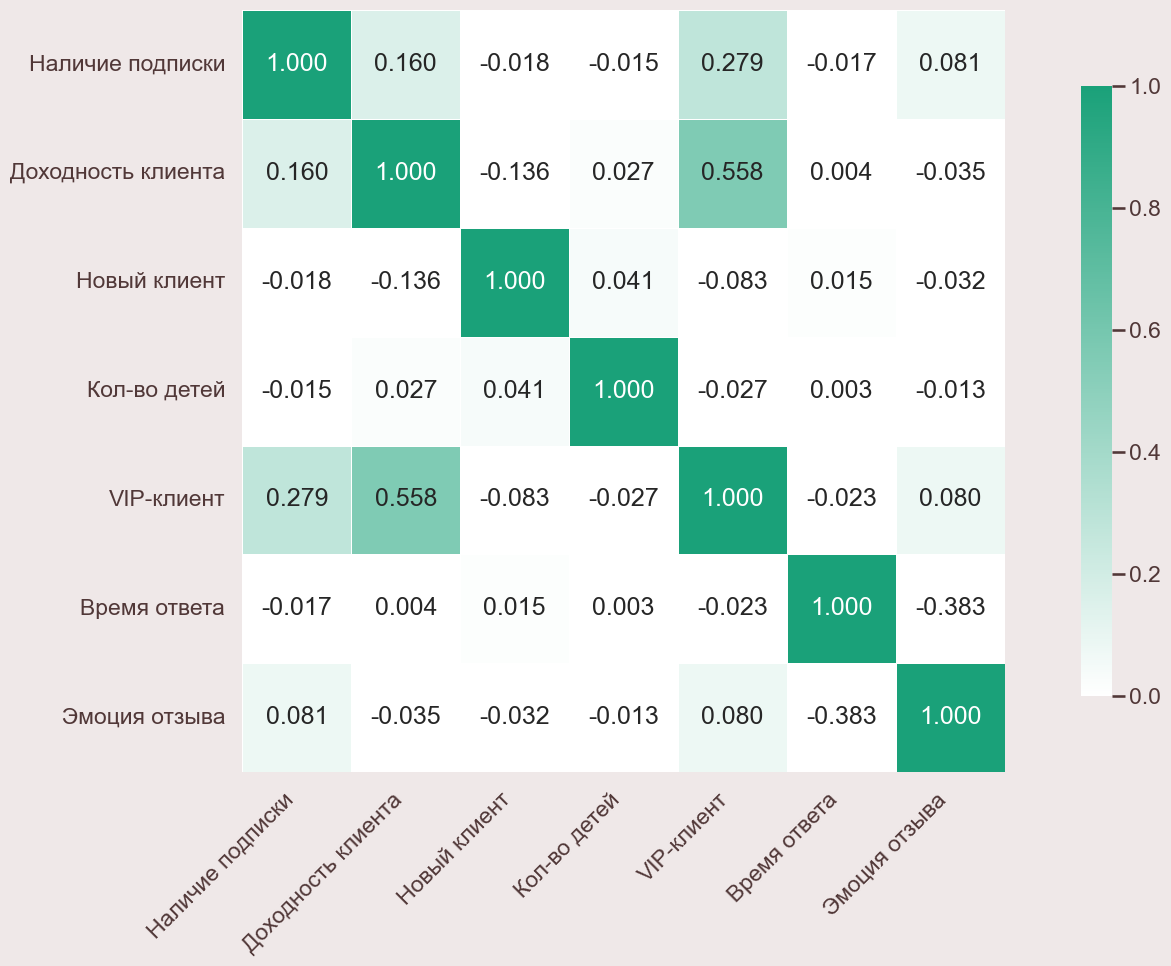


Корреляция между VIP-клиентом и доходностью: 0.558

Сравнение с другими корреляциями is_profitable:
is_profitable                 1.000000
influencer_flg                0.557865
subscription_important_flg    0.160049
children_cnt                  0.027317
review_time                   0.003563
review_emotion               -0.034879
new_flg                      -0.136293
Name: is_profitable, dtype: float64


In [14]:
corr_df = df.copy()

corr_df['is_profitable'] = corr_df['is_profitable'].astype(int)

numeric_vars = ['subscription_important_flg', 'is_profitable',
                'new_flg', 'children_cnt', 'influencer_flg', 'review_time', 'review_emotion']

correlation_matrix = corr_df[numeric_vars].corr()

annot = correlation_matrix.round(3)

from matplotlib.colors import LinearSegmentedColormap

green_grad = LinearSegmentedColormap.from_list("white_to_green", ["#FFFFFF", "#1AA179"])

plt.figure(figsize=(16, 10))
ax = sns.heatmap(
    correlation_matrix, 
    annot=annot, 
    cmap=green_grad, 
    fmt=".3f", 
    cbar=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8},
    vmin=0,
    vmax=1
)

# plt.title("Корреляционная матрица: influencer_flg vs is_profitable выделяется", 
#           fontsize=16, pad=20)

labels = ['Наличие подписки', 'Доходность клиента',
          'Новый клиент', 'Кол-во детей', 'VIP-клиент', 'Время ответа', 'Эмоция отзыва']
ax.set_xticklabels(labels, rotation=45, ha='right')
ax.set_yticklabels(labels, rotation=0)

plt.tight_layout()
plt.show()

print(f"\nКорреляция между VIP-клиентом и доходностью: {correlation_matrix.loc['influencer_flg', 'is_profitable']:.3f}")
print("\nСравнение с другими корреляциями is_profitable:")
print(correlation_matrix['is_profitable'].sort_values(ascending=False))

In [15]:
before = len(df)
duplicates_count = df.duplicated().sum()
df = df.dropna(subset=['influencer_flg'])
df = df.drop_duplicates()
df = df[df['review_emotion'] != 1]
after = len(df)
removed = before - after
print(f"Количество строк до очистки: {before}")
print(f"Количество дубликатов: {duplicates_count}")
print(f"Количество строк после очистки: {after}")
print(f"Удалено строк: {removed}")

print(df['id_client'].nunique())

Количество строк до очистки: 54064
Количество дубликатов: 0
Количество строк после очистки: 17697
Удалено строк: 36367
15985


In [16]:
df.to_csv('dfc.csv', index=False)

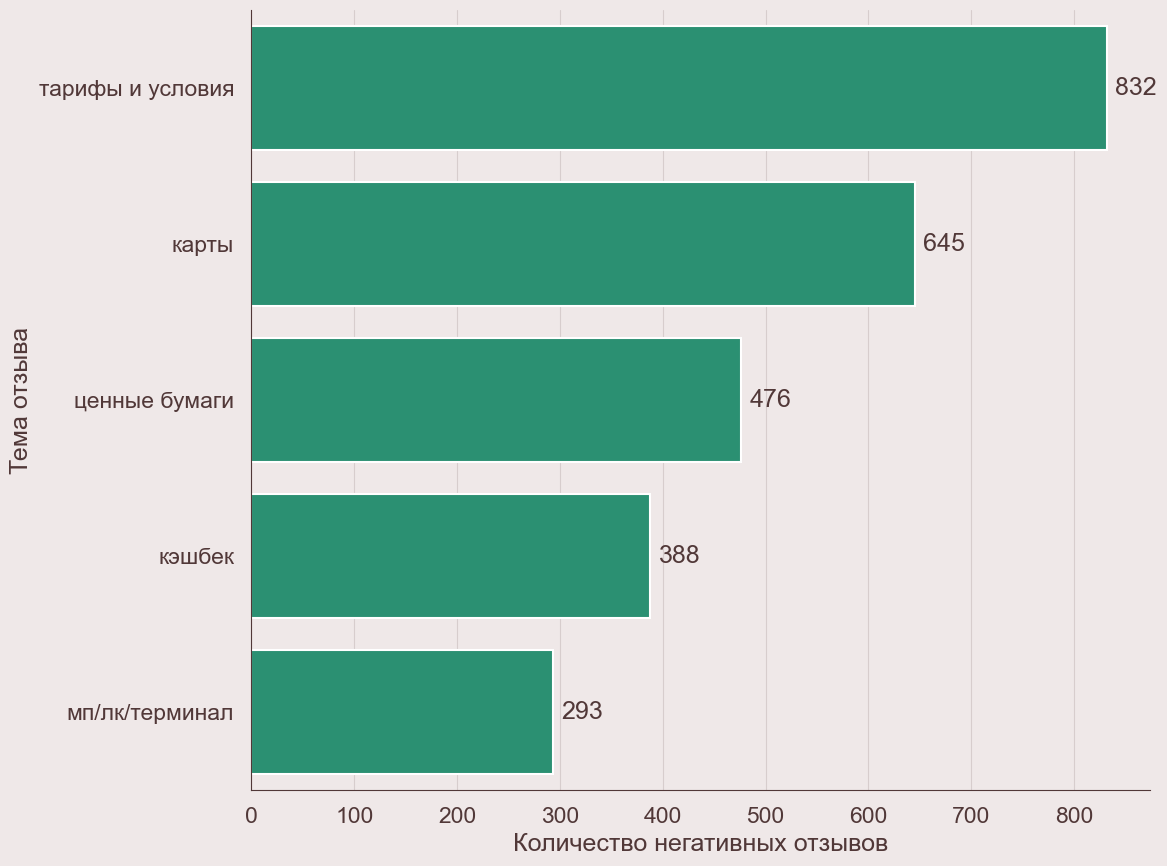

In [17]:
vip_negative = df[(df['influencer_flg'] == 1) & (df['review_emotion'] == 0)]

top_neg_reasons = vip_negative['review_theme'].value_counts().head(5)

plt.figure(figsize=(12, 9))
ax = sns.barplot(
    x=top_neg_reasons.values,
    y=top_neg_reasons.index,
    color=colors['green']
)
plt.xlabel("Количество негативных отзывов", fontsize=18)
plt.ylabel("Тема отзыва", fontsize=18)

for i, (value, label) in enumerate(zip(top_neg_reasons.values, top_neg_reasons.index)):
    ax.text(value + max(top_neg_reasons.values)*0.01, i, str(value), va='center', ha='left', fontsize=18)

plt.tight_layout()
plt.show()


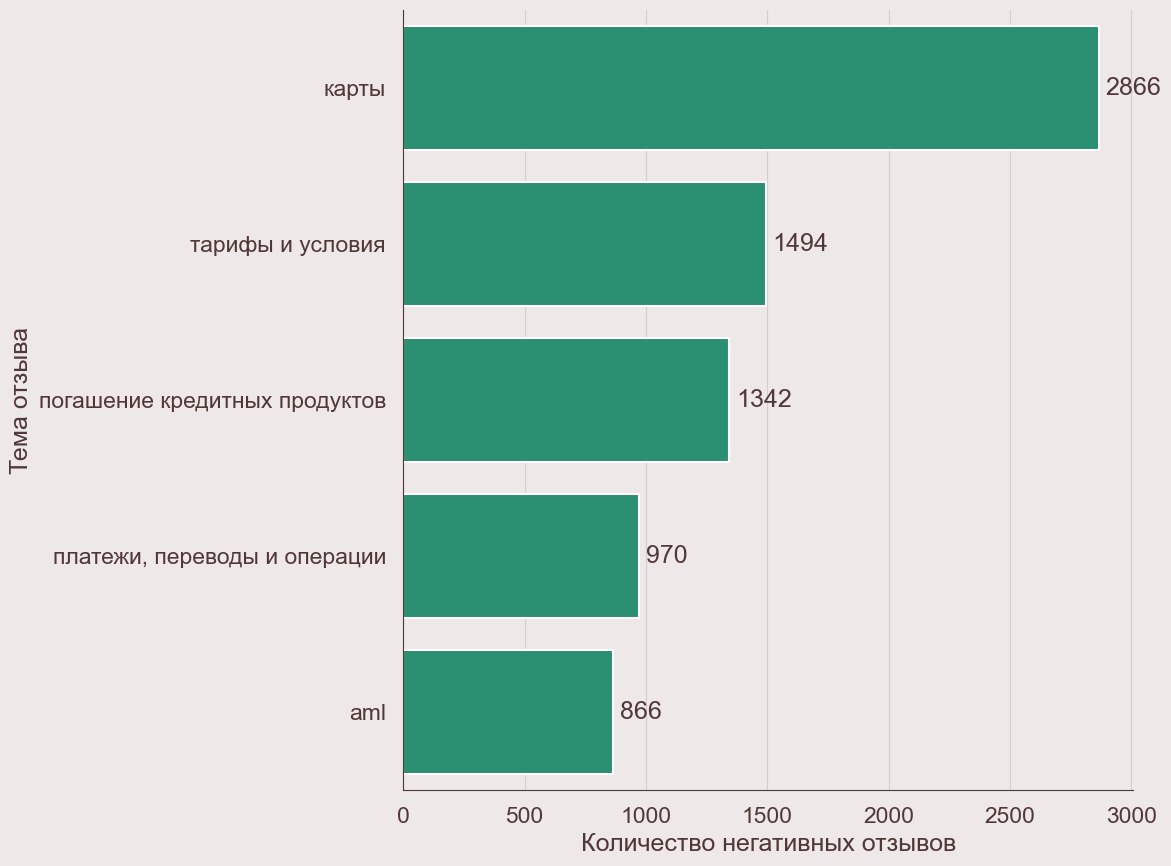

In [18]:
non_vip_negative = df[(df['influencer_flg'] == 0) & (df['review_emotion'] == 0)]

top_neg_reasons_non_vip = non_vip_negative['review_theme'].value_counts().head(5)

plt.figure(figsize=(12, 9))
ax = sns.barplot(
    x=top_neg_reasons_non_vip.values,
    y=top_neg_reasons_non_vip.index,
    color=colors['green']
)
plt.xlabel("Количество негативных отзывов", fontsize=18)
plt.ylabel("Тема отзыва", fontsize=18)

for i, (value, label) in enumerate(zip(top_neg_reasons_non_vip.values, top_neg_reasons_non_vip.index)):
    ax.text(value + max(top_neg_reasons_non_vip.values)*0.01, i, str(value), va='center', ha='left', fontsize=18)

plt.tight_layout()
plt.show()